## Exercise 6: Tricks (regularization, batch normalization, dropout)

### Description

Overfitting can also be counteracted with regularization and dropout. Batch normalization is supposed to mainly decrease convergence time.

1. Try to improve the best validation scores of the model with 1 layer and 100 hidden neurons and the model with 4 hidden layers. Experiment with batch_normalization layers, dropout layers and l1- and l2-regularization on weights (kernels) and biases.
2. After you have found good settings, plot for both models the learning curves of the naive model you fitted in the previous exercises together with the learning curves of the current version.
3. For proper comparison, plot also the learning curves of the two current models in a third figure.

### Solution

**a. Best 1 hidden layer model**

In [313]:
model_1l = Sequential([Dense(units=100, input_dim=256, activation= 'relu'),Dense(5,activation= 'softmax')])
model_1l.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')]
hist_1l = model_1l.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=100, batch_size=512, verbose=0, callbacks=callback)
acc_1l = model_1l.evaluate(x_test, y_test, verbose=0)

Epoch 00078: early stopping


In [314]:
print("Accuracy = {}%".format((acc_1l[1]*100)))

Accuracy = 87.79137330042525%


**b. Regularized 1 hidden layer model**

In [237]:
reg2_model_1l = Sequential()
reg2_model_1l.add(Dense(units=100, input_dim=256, activation= 'relu', kernel_regularizer= regularizers.l2(0.0005)))
reg2_model_1l.add(BatchNormalization())
reg2_model_1l.add(Dropout(0.15))
reg2_model_1l.add(Dense(5,activation= 'softmax', kernel_regularizer=regularizers.l2(0.0005)))
reg2_model_1l.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
reg2_callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')]
reg2_hist_1l = reg2_model_1l.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=100, verbose=1, callbacks=reg2_callback, batch_size=512)
reg2_acc_1l = reg2_model_1l.evaluate(x_test, y_test, verbose=1)

Train on 40166 samples, validate on 14629 samples
Epoch 1/100
40166/40166 [==============================] - 7s 182us/step - loss: 1.4355 - acc: 0.4646 - val_loss: 1.1171 - val_acc: 0.6076
Epoch 2/100
40166/40166 [==============================] - 1s 24us/step - loss: 1.0451 - acc: 0.6464 - val_loss: 0.9744 - val_acc: 0.6663
Epoch 3/100
40166/40166 [==============================] - 1s 31us/step - loss: 0.8868 - acc: 0.7191 - val_loss: 0.8683 - val_acc: 0.7191
Epoch 4/100
40166/40166 [==============================] - 1s 25us/step - loss: 0.7947 - acc: 0.7597 - val_loss: 0.8090 - val_acc: 0.7498
Epoch 5/100
40166/40166 [==============================] - 1s 28us/step - loss: 0.7400 - acc: 0.7797 - val_loss: 0.7536 - val_acc: 0.7823
Epoch 6/100
40166/40166 [==============================] - 1s 30us/step - loss: 0.7043 - acc: 0.7909 - val_loss: 0.6890 - val_acc: 0.8083
Epoch 7/100
40166/40166 [==============================] - 1s 26us/step - loss: 0.6681 - acc: 0.8062 - val_loss: 0.7615 -

In [312]:
print("Accuracy = {}%".format((reg2_acc_1l[1]*100)))

Accuracy = 87.3470503801983%


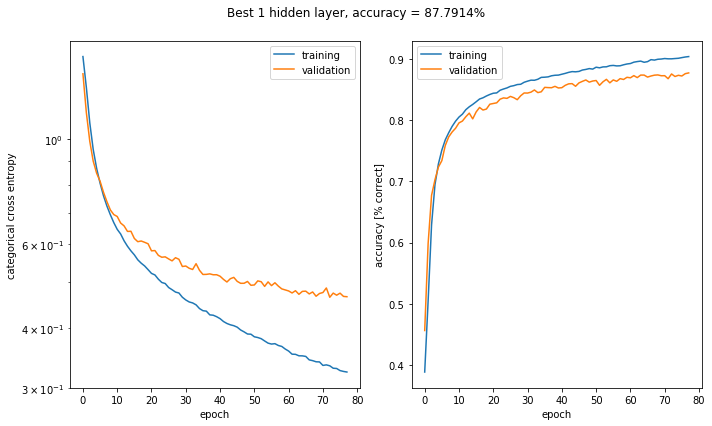

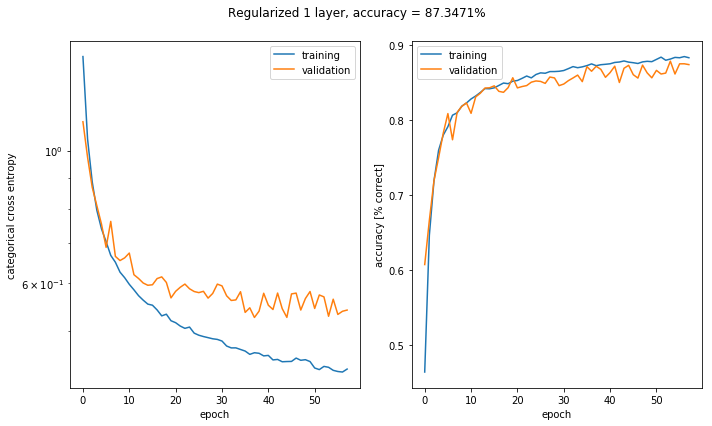

In [319]:
plot_history(hist_1l, 'Best 1 hidden layer, accuracy = {}%'.format(round(acc_1l[1]*100, 4)))
plot_history(reg2_hist_1l, 'Regularized 1 layer, accuracy = {}%'.format(round(reg2_acc_1l[1]*100,4)))

**Regularized 4 hidden layer model**

In [9]:
model_4l_reg = Sequential([Dense(units=59, input_dim=256, activation= 'relu', kernel_regularizer=regularizers.l1(0.0002)),
                                  Dropout(0.1),
                                  Dense(59,activation= 'relu',kernel_regularizer=regularizers.l1(0.0002)), 
                                  Dropout(0.1),
                                  Dense(59,activation= 'relu', kernel_regularizer=regularizers.l1(0.0002)), 
                                  Dropout(0.1),
                                  Dense(59,activation= 'relu', kernel_regularizer=regularizers.l1(0.0002)),
                                  Dropout(0.1),
                                  Dense(5,activation= 'softmax')])

In [10]:
model_4l_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')]
hist_4l_reg = model_4l_reg.fit(x_train, y_train,batch_size=128, validation_data= (x_test, y_test), epochs=700, verbose=0, callbacks= callback)
acc_4l_reg = model_4l_reg.evaluate(x_test, y_test, verbose=0)


In [14]:
acc_4l_reg

[0.54324828054602492, 0.87565074135483389]

**Best 4 hidden layer model**

In [ ]:
best_4l_accs = list(map(lambda x: x[1], accs_4l))
best_4l_acc, best_4l_idx = (max(best_4l_accs), best_4l_accs.index(max(best_4l_accs)))
best_4l_model = hists_4l[best_4l_idx]

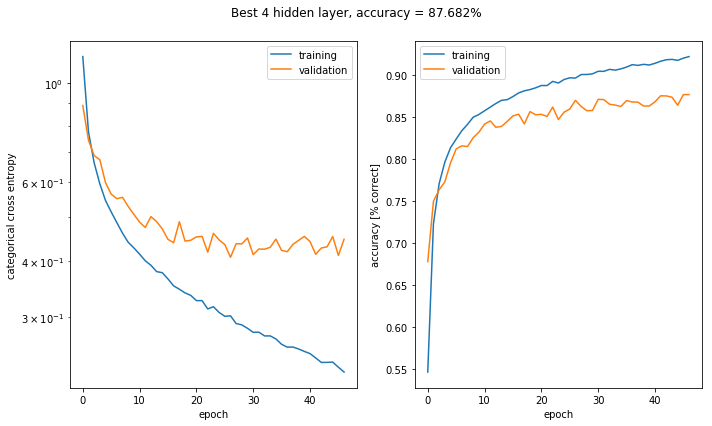

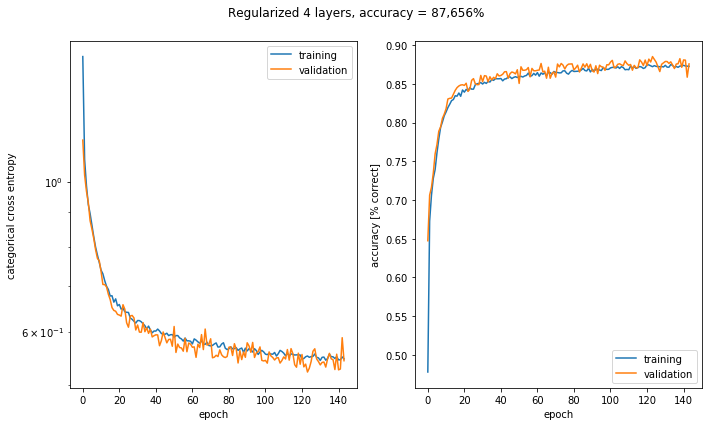

In [15]:
plot_history(best_4l_model, "Best 4 hidden layer model, accuracy = 87.682%")
plot_history(hist_4l_reg, "Regularized 4 layers, accuracy = 87,656%")
plt.show()